<a href="https://colab.research.google.com/github/saha-trideep/Learn-PyTorch-for-Deep-Learning/blob/main/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise

The following is a template for the PyTorch workflow exercises.




In [ ]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
# Setup device-agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [ ]:
# Create the data parameters
weight = 0.3
bias = 0.9

start = 0
end = 10
step = 0.2
# Make X and y using linear regression feature
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 50
Number of y samples: 50
First 10 X & y samples:
X: tensor([[0.0000],
        [0.2000],
        [0.4000],
        [0.6000],
        [0.8000],
        [1.0000],
        [1.2000],
        [1.4000],
        [1.6000],
        [1.8000]])
y: tensor([[0.9000],
        [0.9600],
        [1.0200],
        [1.0800],
        [1.1400],
        [1.2000],
        [1.2600],
        [1.3200],
        [1.3800],
        [1.4400]])


In [ ]:
# Split the data into training and testing
train_split = int(len(X) * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

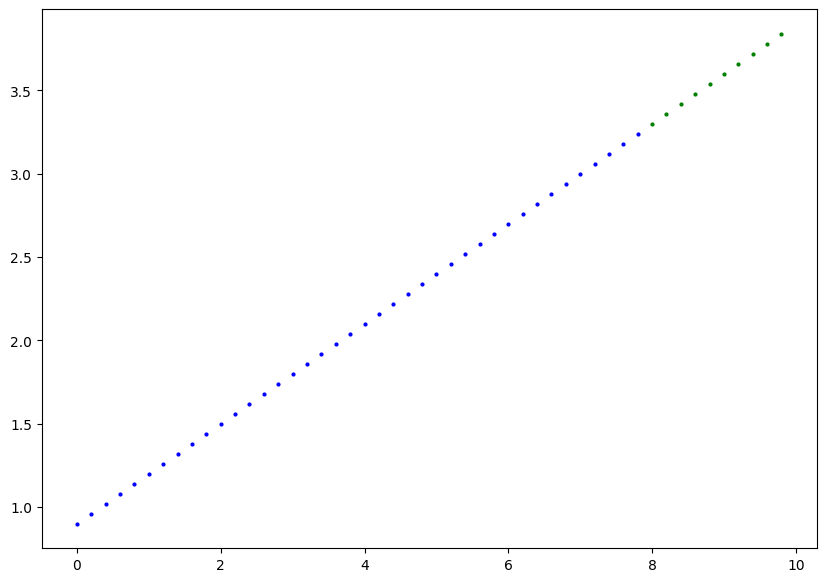

In [ ]:
# Plot the training and testing data
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    prediction=None):
  """
  plot train data, test data and prediction
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', s=4, label='Train Data')
  plt.scatter(test_data, test_labels, c='g', s=4, label="Test Data")

  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', s=4, label='Prediction')

plot_prediction()

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [ ]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1,
                            out_features=1,
                            bias=True,
                            device=device)
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear(x)

In [ ]:
# Instantiate the model and put it to the target device
torch.manual_seed(42)
model = LinearRegressionModel()
model.state_dict()


OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [ ]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model.train()

  # 1. Forward pass
  y_pred = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train) # (guess, truth)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      y_pred_test = model(X_test)

      # 2. Calculate test loss
      test_loss = loss_fn(y_pred_test, y_test)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 1.745 | Test loss: 3.708
Epoch: 20 | Train loss: 0.057 | Test loss: 0.093
Epoch: 40 | Train loss: 0.066 | Test loss: 0.309
Epoch: 60 | Train loss: 0.043 | Test loss: 0.320
Epoch: 80 | Train loss: 0.041 | Test loss: 0.300
Epoch: 100 | Train loss: 0.024 | Test loss: 0.323
Epoch: 120 | Train loss: 0.019 | Test loss: 0.328
Epoch: 140 | Train loss: 0.018 | Test loss: 0.330
Epoch: 160 | Train loss: 0.018 | Test loss: 0.330
Epoch: 180 | Train loss: 0.018 | Test loss: 0.330
Epoch: 200 | Train loss: 0.018 | Test loss: 0.330
Epoch: 220 | Train loss: 0.018 | Test loss: 0.330
Epoch: 240 | Train loss: 0.018 | Test loss: 0.330
Epoch: 260 | Train loss: 0.018 | Test loss: 0.330
Epoch: 280 | Train loss: 0.018 | Test loss: 0.330


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
# Make predictions with the model
model.eval()
with torch.inference_mode():
  y_pred_new = model(X_test)


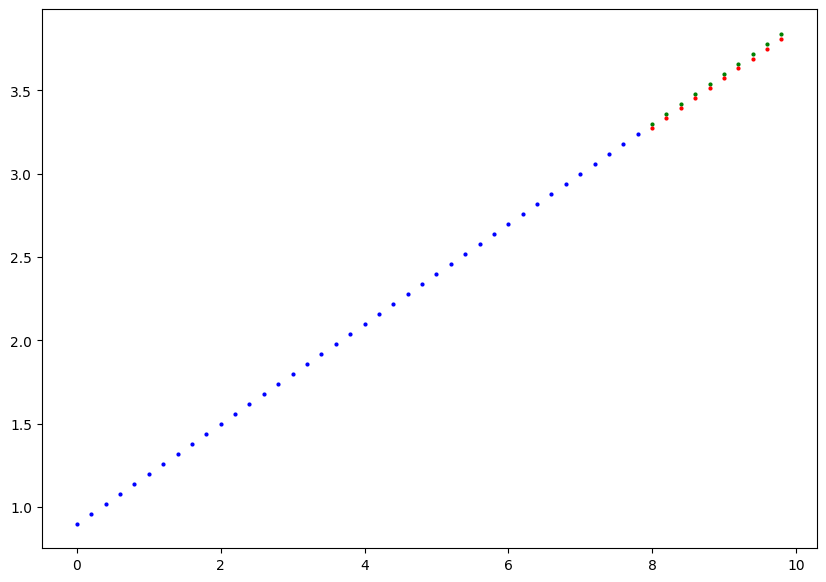

In [ ]:
# Plot the predictions (these may need to be on a specific device)
plot_prediction(prediction=y_pred_new.cpu())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True ,exist_ok=True)

# 2. Create model save path
MODEL_NAME = "PyTorchLinear.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state dict
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, MODEL_SAVE_PATH)


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
model_0 = LinearRegressionModel()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
checkpoint = torch.load(MODEL_SAVE_PATH)
model_0.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

model_0.to(device)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Make predictions with loaded model and compare them to the previous
model_0.eval()
with torch.inference_mode():
  y_pred_0 = model_0(X_test)

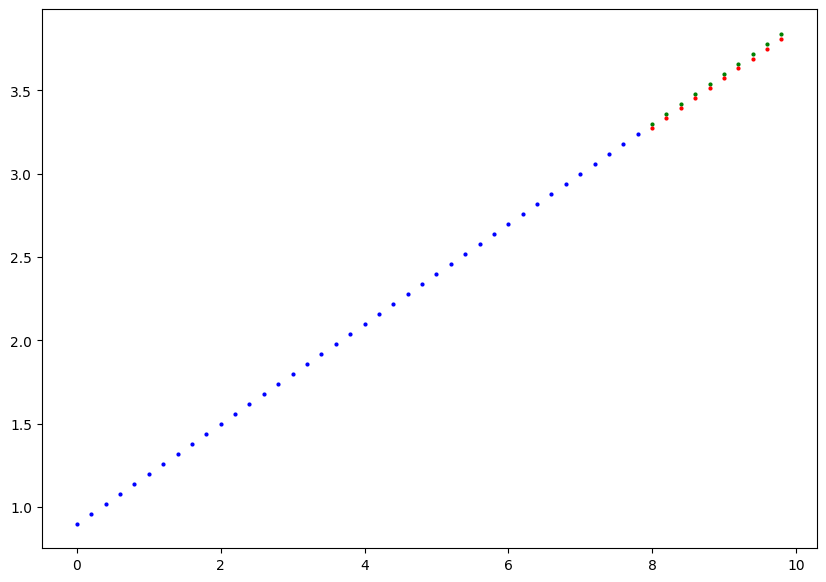

In [ ]:
plot_prediction(prediction=y_pred_0.cpu())

In [ ]:
model_0.state_dict()

OrderedDict([('linear.weight', tensor([[0.2980]])),
             ('linear.bias', tensor([0.8900]))])